In [2]:
import numpy as np
import pandas as pd
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Генерируем множество точек
n=150
X=np.random.uniform(-1, 1, n)
y=X*5+np.random.uniform(-5, 5, n)

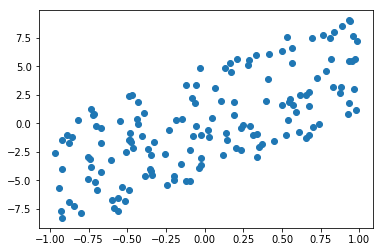

In [3]:
plt.scatter(X,y)

In [94]:
model = lambda w, X: w[0]  + w[1] * X
obj = lambda w, y, X: np.sum((model(w, X)-y)**2)
res = minimize(obj, args=(y, X), x0=np.array([0, 0]))

In [95]:
res

      fun: 1241.1495064321646
 hess_inv: array([[ 0.00606834, -0.00052738],
       [-0.00052738,  0.00115013]])
      jac: array([-1.52587891e-05, -1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 41
      nit: 6
     njev: 10
   status: 2
  success: False
        x: array([5.06816378e-03, 5.16529205e+00])

In [96]:
w0=res.x[0]
w1=res.x[1]
print(f"w0={w0}, w1={w1}")

w0=0.005068163776591621, w1=5.165292047814527


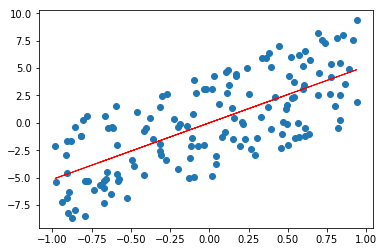

In [97]:
plt.scatter(X,y)
plt.plot(X,w1*X+w0, color='red', linewidth=1)
plt.show()

In [3]:
def cost_function(X, y, w):
    a = len(y)
    b = np.sum((X.dot(w)-y)**2)/a
    return b

def gradient_descent(X, y, w, alpha, iterations,accuracy):
    cost_history = []
    
    X_=np.column_stack(([1] * len(X), X))
    
    for iteration in range(iterations):
        gradient = X_.T.dot(X_.dot(w)-y)*2/len(y)
        w = w - alpha*gradient
        cost = cost_function(X_, y, w)
        cost_history.append(cost)
        if cost<accuracy:
            break

    return w, cost_history

def Stochastic_gradient_descent(X, y, w, alpha, iterations,accuracy):
    cost_history = []
    
    X_=np.column_stack(([1] * len(X), X))
    for iteration in range(iterations):
        rand_ind=np.random.randint(0,len(y))
        gradient = X_[rand_ind].T.dot(X_[rand_ind].dot(w)-y[rand_ind])*2/len(y)
        w = w - alpha*gradient
        cost = cost_function(X_, y, w)
        cost_history.append(cost)
        if cost<accuracy:
            break

    return w, cost_history

In [5]:
#Градиентный спуск
w = np.array([0, 0])
alpha=0.1
iterations=1000
accuracy=10**(-5)
(w, c) = gradient_descent(X,y,w,alpha, iterations,accuracy)
w

array([-0.05479386,  4.92253892])

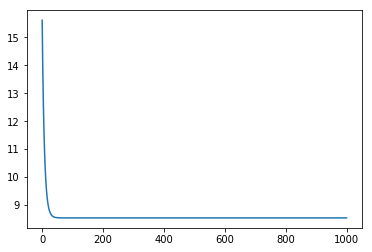

In [6]:
plt.plot(range(len(c)), c)

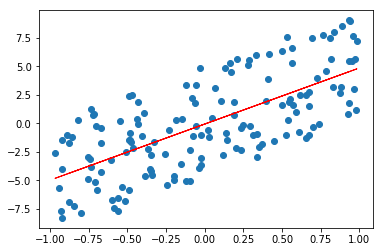

In [7]:
plt.scatter(X,y)
plt.plot(X,w[1]*X+w[0], color='red', linewidth=1)
plt.show()

In [8]:
#Стохастический Градиентный спуск
w = np.array([0, 0])
alpha=5
iterations=1000
accuracy=10**(-5)
(w_1, c_1) = Stochastic_gradient_descent(X,y,w,alpha, iterations,accuracy)
w_1

array([-0.09717774,  4.91599539])

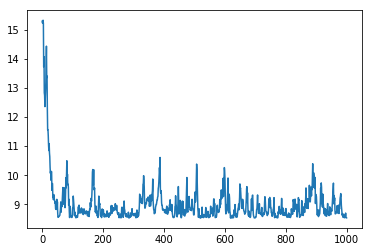

In [9]:
plt.plot(range(0,len(c_1)),c_1);

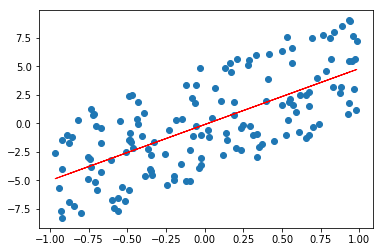

In [10]:
plt.scatter(X,y)
plt.plot(X,w_1[1]*X+w_1[0], color='red', linewidth=1)
plt.show()

In [50]:
#Генерируем множество точек распределенных по косинусоиде
def polinon(X):
    return np.cos(1.5 * np.pi * X)

n_1 = 100

X = np.sort(np.random.rand(n_1))
y = polinon(X) + np.random.randn(n_1) * 0.1

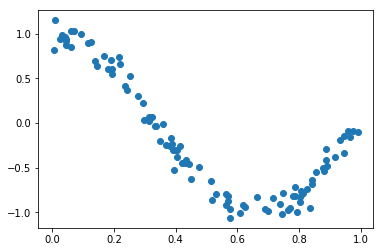

In [51]:
plt.plot(X, y, 'o');

In [59]:
#Полином 2 степени
X2=np.column_stack((X, X**2))
w2 = np.array([0, 0,0])
alpha=0.7
iterations=1000000
accuracy=10**(-5)
w2,c=gradient_descent(X2,y,w2,alpha, iterations,accuracy)
c[-1]

0.04093680394746469

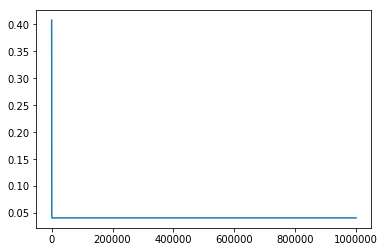

In [60]:
plt.plot(range(0,len(c)),c);

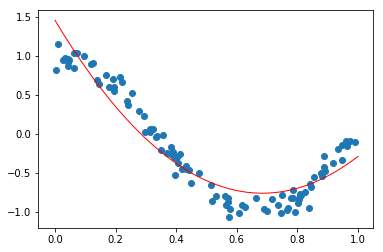

In [61]:
Y=np.linspace(0, 1, 200)
plt.scatter(X,y)
plt.plot(Y,w2[2]*Y**2+w2[1]*Y+w2[0], color='red', linewidth=1)
plt.show()


In [62]:
#Полином 2 степени
X2=np.column_stack((X, X**2))
w2 = np.array([0, 0,0])
alpha=0.7
iterations=100000
accuracy=10**(-5)
w2,c=Stochastic_gradient_descent(X2,y,w2,alpha, iterations,accuracy)
c[-1]

0.0410716433469442

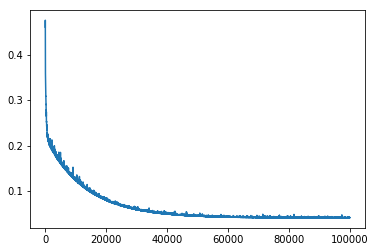

In [63]:
plt.plot(range(0,len(c)),c);

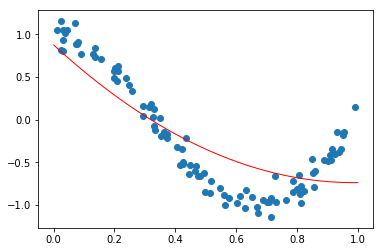

In [49]:
Y=np.linspace(0, 1, 200)
plt.scatter(X,y)
plt.plot(Y,w2[2]*Y**2+w2[1]*Y+w2[0], color='red', linewidth=1)
plt.show()


In [66]:
#Полином 3 степени
X3=np.column_stack((X2, X**3))
w3 = np.array([0, 0,0,0])
alpha=0.6
iterations=1000000
accuracy=10**(-5)
w3,c=gradient_descent(X3,y,w3,alpha, iterations,accuracy)
c[-1]

0.011349624613176497

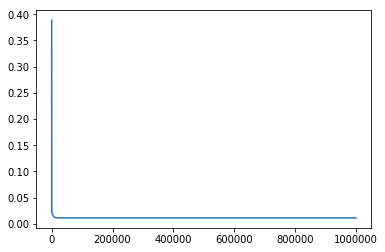

In [67]:
plt.plot(range(0,len(c)),c);

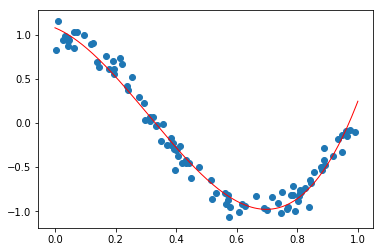

In [68]:

plt.scatter(X,y)
plt.plot(Y,w3[3]*Y**3+w3[2]*Y**2+w3[1]*Y+w3[0], color='red', linewidth=1)
plt.show()

In [71]:
#Полином 4 степени
X4=np.column_stack((X3, X**4))
w4 = np.array([0, 0,0,0,0])
alpha=0.5
iterations=1000000
accuracy=10**(-5)
w4,c=gradient_descent(X4,y,w4,alpha, iterations,accuracy)
c[-1]

0.00801129468194853

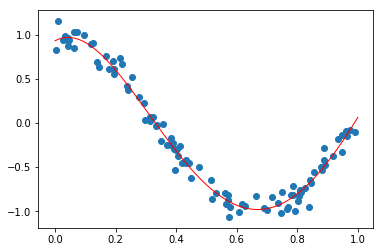

In [72]:
plt.scatter(X,y)
plt.plot(Y,w4[4]*Y**4+w4[3]*Y**3+w4[2]*Y**2+w4[1]*Y+w4[0], color='red', linewidth=1)
plt.show()

In [73]:
#Полином 5 степени
X5=np.column_stack((X4, X**5))
w5 = np.array([0, 0,0,0,0,0])
alpha=0.4
iterations=1000000
accuracy=10**(-5)
w5,c=gradient_descent(X5,y,w5,alpha, iterations,accuracy)
c[-1]

0.008033552395470966

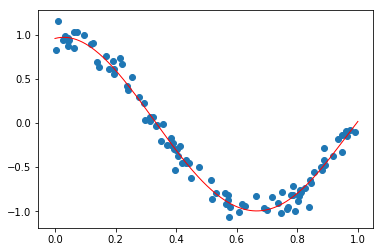

In [74]:
plt.scatter(X,y)
plt.plot(Y,w5[5]*Y**5+w5[4]*Y**4+w5[3]*Y**3+w5[2]*Y**2+w5[1]*Y+w5[0], color='red', linewidth=1)
plt.show()

In [78]:
#Полином 6 степени
X6=np.column_stack((X5, X**6))
w6 = np.array([0, 0,0,0,0,0,0])
alpha=0.4
iterations=400000
accuracy=10**(-5)
w6,c=gradient_descent(X6,y,w6,alpha, iterations,accuracy)
c[-1]

0.008221347133668871

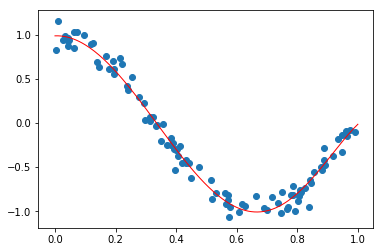

In [79]:
plt.scatter(X,y)
plt.plot(Y,w6[6]*Y**6+w6[5]*Y**5+w6[4]*Y**4+w6[3]*Y**3+w6[2]*Y**2+w6[1]*Y+w6[0], color='red', linewidth=1)
plt.show()

In [80]:
#Полином 7 степени
X7=np.column_stack((X6, X**7))
w6 = np.array([0, 0,0,0,0,0,0,0])
alpha=0.4
iterations=400000
accuracy=10**(-5)
w7,c=gradient_descent(X7,y,w6,alpha, iterations,accuracy)
c[-1]

0.008339473643997772

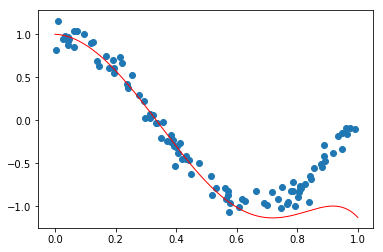

In [81]:
plt.scatter(X,y)
plt.plot(Y,w7[7]*Y**7+w7[7]*Y**6+w7[5]*Y**5+w7[4]*Y**4+w7[3]*Y**3+w7[2]*Y**2+w7[1]*Y+w7[0], color='red', linewidth=1)
plt.show()

In [82]:
#Полином 8 степени
X8=np.column_stack((X7, X**8))
w7 = np.array([0, 0,0,0,0,0,0,0,0])
alpha=0.3
iterations=100000
accuracy=10**(-5)
w8,c=gradient_descent(X8,y,w7,alpha, iterations,accuracy)
c[-1]

0.0088972659411169

In [84]:
# В данном случае полином 4-ой степени является самым оптимальным варинтом, так как ошибка на нём низкая и судя по графику хорошо описывает функцию, а также не подгоняется под все точки.